In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
df['salary'] = df['salary'].fillna(0,axis=0)

In [7]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [8]:
df.duplicated

<bound method DataFrame.duplicated of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sc

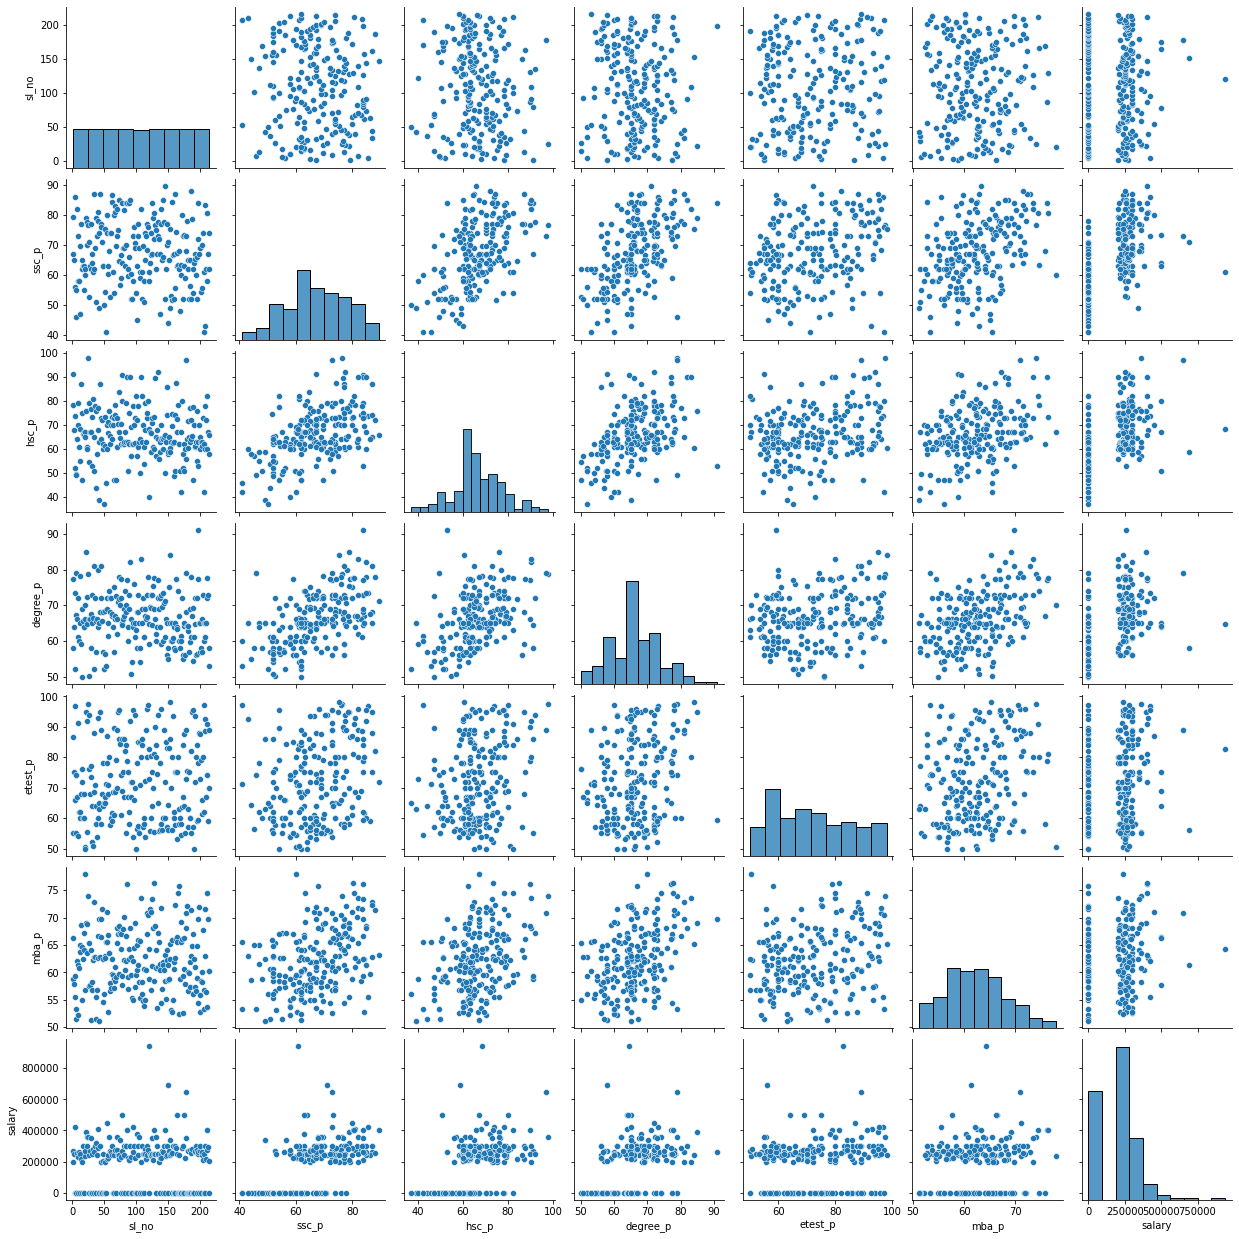

In [9]:
sns.pairplot(df,palette='rainbow')

<AxesSubplot:xlabel='salary', ylabel='Density'>

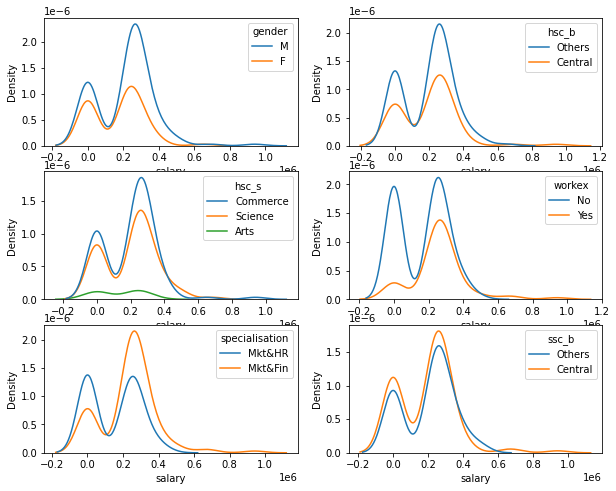

In [10]:
fig,ax = plt.subplots(3,2, figsize=(10,8))
sns.kdeplot('salary',hue='gender',data=df,ax=ax[0,0])
sns.kdeplot('salary',hue='hsc_b',data=df,ax=ax[0,1])
sns.kdeplot('salary',hue='hsc_s',data=df,ax=ax[1,0])
sns.kdeplot('salary',hue='workex',data=df,ax=ax[1,1])
sns.kdeplot('salary',hue='specialisation',data=df,ax=ax[2,0])
sns.kdeplot('salary',hue='ssc_b',data=df,ax=ax[2,1])


In [11]:
df['gender'] = df['gender'].map({'M':0,'F':1})
cd = df[['ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']]

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
oe = OrdinalEncoder()
encode = oe.fit_transform(cd)

In [14]:
df[['ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']] = encode


In [15]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,55.0,1.0,58.80,1.0,270000.0
1,2,0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,86.5,0.0,66.28,1.0,200000.0
2,3,0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,75.0,0.0,57.80,1.0,250000.0
3,4,0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,66.0,1.0,59.43,0.0,0.0
4,5,0,85.80,0.0,73.60,0.0,1.0,73.30,0.0,0.0,96.8,0.0,55.50,1.0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,1.0,82.00,1.0,1.0,77.60,0.0,0.0,91.0,0.0,74.49,1.0,400000.0
211,212,0,58.00,1.0,60.00,1.0,2.0,72.00,2.0,0.0,74.0,0.0,53.62,1.0,275000.0
212,213,0,67.00,1.0,67.00,1.0,1.0,73.00,0.0,1.0,59.0,0.0,69.72,1.0,295000.0
213,214,1,74.00,1.0,66.00,1.0,1.0,58.00,0.0,0.0,70.0,1.0,60.23,1.0,204000.0


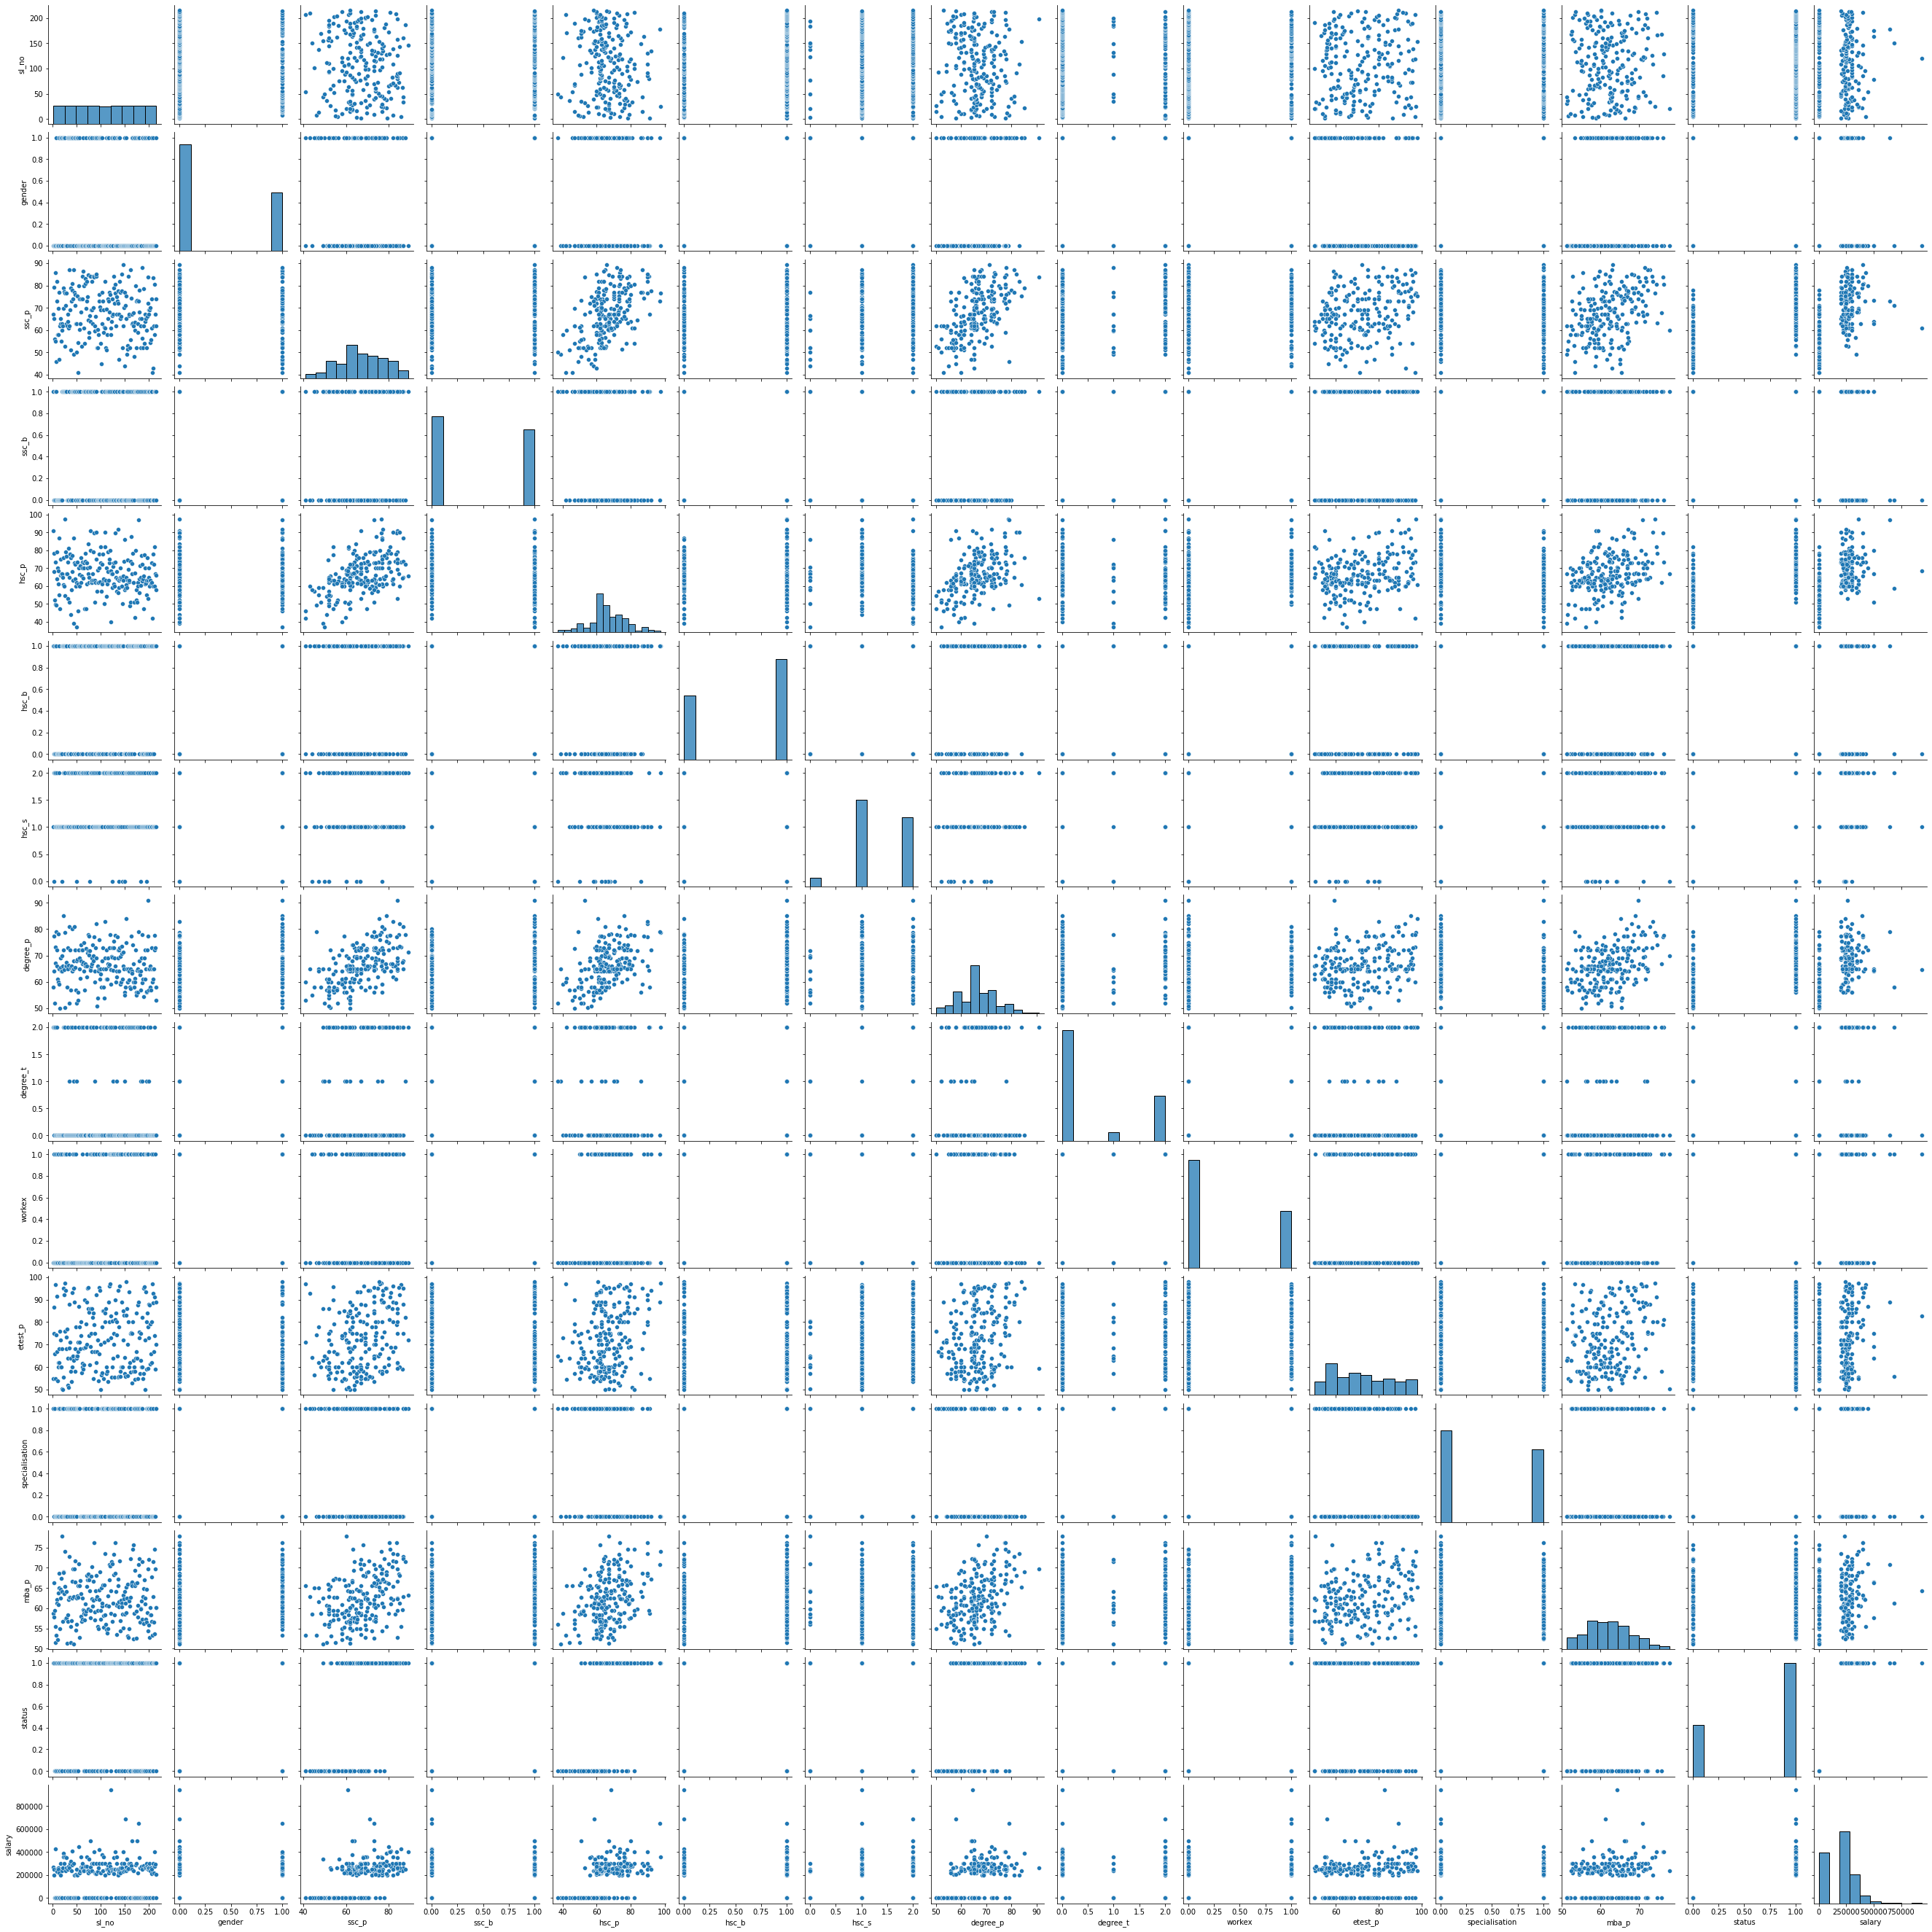

In [16]:
sns.pairplot(df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='salary'>

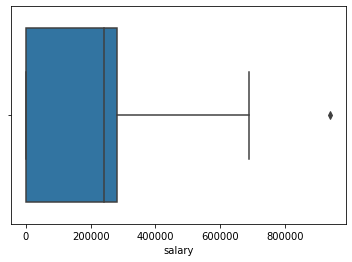

In [17]:
sns.boxplot(df['salary'])

<AxesSubplot:xlabel='salary', ylabel='mba_p'>

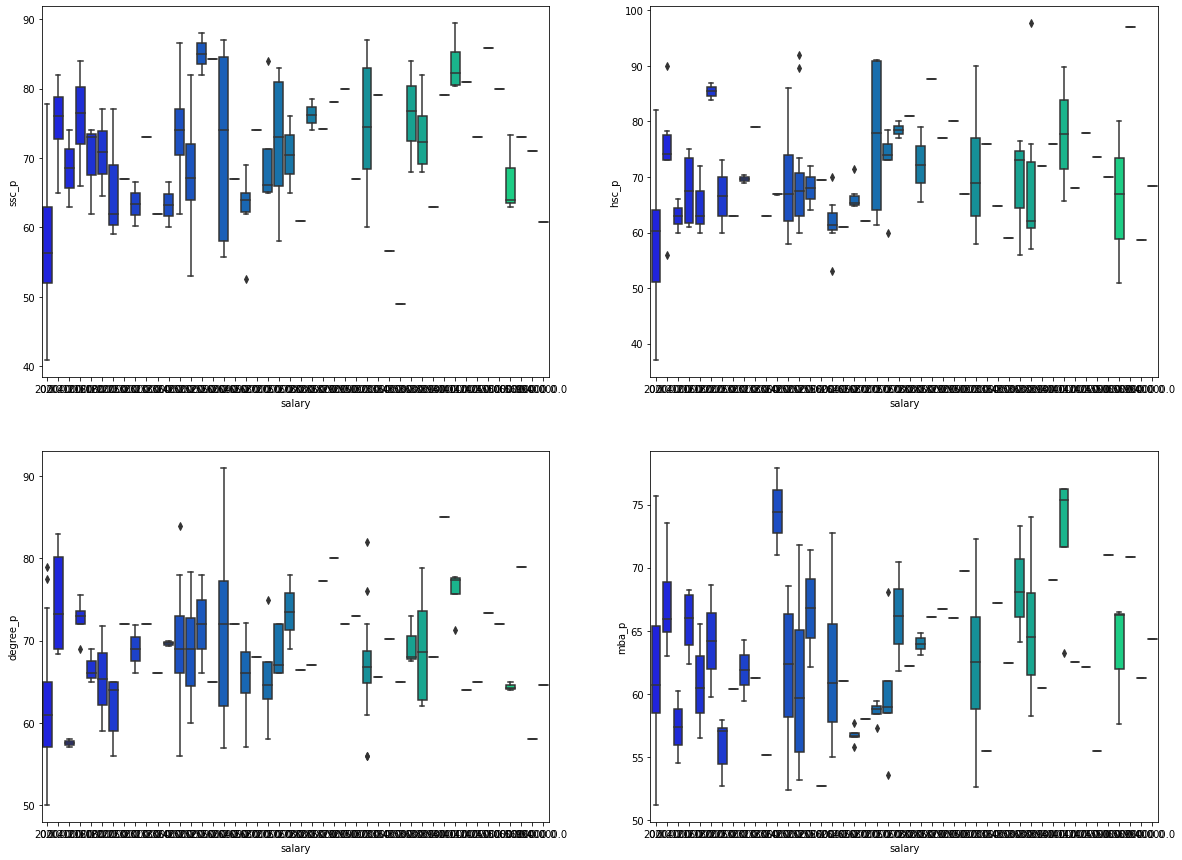

In [18]:
fig, ax = plt.subplots(2,2, figsize=(20,15))
sns.boxplot(y=df['ssc_p'],x=df['salary'],palette='winter',ax=ax[0,0])
sns.boxplot(y=df['hsc_p'],x=df['salary'],palette='winter',ax=ax[0,1])
sns.boxplot(y=df['degree_p'],x=df['salary'],palette='winter',ax=ax[1,0])
sns.boxplot(y=df['mba_p'],x=df['salary'],palette='winter',ax=ax[1,1])


In [19]:
df['degree_p'].mean()

66.37018604651163

In [20]:
## Null hypothesis is the sample mean equals 66.37 and alternate hypothesis is the sample mean is not equal to 66.37

In [21]:
from scipy import stats

In [22]:
np.random.seed(seed=25)
sam = df.sample(100)
sam

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
43,44,0,87.0,1.0,87.00,1.0,1.0,68.0,0.0,0.0,95.00,1.0,62.90,1.0,300000.0
180,181,0,65.0,0.0,71.50,1.0,1.0,62.8,0.0,1.0,57.00,0.0,56.60,1.0,265000.0
34,35,0,62.0,1.0,51.00,1.0,2.0,52.0,1.0,0.0,68.44,1.0,62.77,0.0,0.0
41,42,1,74.0,1.0,63.16,1.0,1.0,65.0,0.0,1.0,65.00,1.0,69.76,0.0,0.0
157,158,0,66.5,0.0,62.50,0.0,1.0,60.9,0.0,0.0,93.40,0.0,55.03,1.0,300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,153,1,75.4,1.0,60.50,0.0,2.0,84.0,2.0,0.0,98.00,0.0,65.25,1.0,240000.0
126,127,1,79.0,1.0,61.00,1.0,2.0,75.5,2.0,1.0,70.00,0.0,68.20,1.0,210000.0
101,102,0,63.0,0.0,72.00,0.0,1.0,68.0,0.0,0.0,78.00,1.0,60.44,1.0,380000.0
20,21,0,62.0,1.0,65.00,1.0,1.0,66.0,0.0,0.0,50.00,1.0,56.70,1.0,265000.0


In [23]:
stats.ttest_1samp(sam['degree_p'], 60)

Ttest_1sampResult(statistic=8.016776010743717, pvalue=2.209690811053295e-12)

In [24]:
X = df.drop('status',axis=1)
y = df['status']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression, Lasso

In [28]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [29]:
predict = reg.predict(X_test)

In [30]:
from sklearn.metrics import check_scoring, classification_report, confusion_matrix, accuracy_score

In [31]:
reg.score(X_train,y_train)

0.8265653338383181

In [32]:
ls = Lasso()
ls.fit(X_train,y_train)

Lasso()

In [33]:
pred = ls.predict(X_test)

In [34]:
ls.score(X_train,y_train)

0.7339235287382371

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
rfc_pred = rfc.predict(X_test)

In [38]:
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [39]:
print(confusion_matrix(y_test,rfc_pred))

[[21  0]
 [ 0 44]]


In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
kn_pred = kn.predict(X_test)

In [43]:
print(classification_report(y_test,kn_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [44]:
kn_pred

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.])

In [45]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict = knn.predict(X_test)
    error_rate.append(np.mean(predict != y_test))

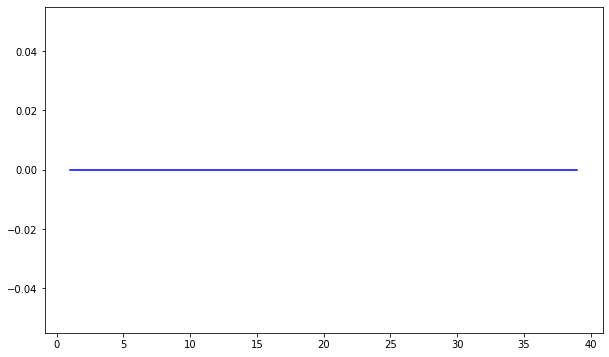

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue')

In [47]:
data = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [48]:
data['degree_t']

0       Sci&Tech
1       Sci&Tech
2      Comm&Mgmt
3       Sci&Tech
4      Comm&Mgmt
         ...    
210    Comm&Mgmt
211     Sci&Tech
212    Comm&Mgmt
213    Comm&Mgmt
214    Comm&Mgmt
Name: degree_t, Length: 215, dtype: object

In [49]:
deg = pd.get_dummies(data['degree_t'])
deg

,Comm&Mgmt,Others,Sci&Tech
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
210,1,0,0
211,0,0,1
212,1,0,0
213,1,0,0


In [50]:
## null hypothesis is all the mean are equal.
## Alternate hypothesis is at least one mean are not equal.

In [51]:
stats.f_oneway(deg['Comm&Mgmt'],deg['Others'],deg['Sci&Tech'],data['mba_p'])

F_onewayResult(statistic=23915.951401285296, pvalue=0.0)

In [52]:
data = pd.get_dummies(data)

In [53]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [54]:
data['intercept'] = 1

In [55]:
X = df[['ssc_p','hsc_p',]]
y = df['mba_p']

In [56]:
X = sm.add_constant(X)

X

,const,ssc_p,hsc_p
0,1.0,67.00,91.00
1,1.0,79.33,78.33
2,1.0,65.00,68.00
3,1.0,56.00,52.00
4,1.0,85.80,73.60
...,...,...,...
210,1.0,80.60,82.00
211,1.0,58.00,60.00
212,1.0,67.00,67.00
213,1.0,74.00,66.00


In [57]:
X.shape

(215, 3)

In [58]:
y.shape

(215,)

In [59]:
result = sm.OLS(y,X).fit()


In [60]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  mba_p   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     23.89
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           4.40e-10
Time:                        11:41:33   Log-Likelihood:                -661.89
No. Observations:                 215   AIC:                             1330.
Df Residuals:                     212   BIC:                             1340.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.6052      2.587     17.243      0.000      39.506      49.704
ssc_p          0.1510      0.039      3.883      0.000       0.074       0.228
hsc_p          0.1132      0.039      2.928      0.004       0.037       0.189
==============================================================================
Omnibus:                        3.143   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                2.890
Skew:                           0.209   Prob(JB):                        0.236
Kurtosis:                       2.616   Cond. No.                         684.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i)
                    for i in range(X.shape[1])]
vif['features'] = X.columns

In [63]:
vif

,VIF Factor,features
0,51.323920,const
1,1.354286,ssc_p
2,1.354286,hsc_p


In [64]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,55.0,1.0,58.80,1.0,270000.0
1,2,0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,86.5,0.0,66.28,1.0,200000.0
2,3,0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,75.0,0.0,57.80,1.0,250000.0
3,4,0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,66.0,1.0,59.43,0.0,0.0
4,5,0,85.80,0.0,73.60,0.0,1.0,73.30,0.0,0.0,96.8,0.0,55.50,1.0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,1.0,82.00,1.0,1.0,77.60,0.0,0.0,91.0,0.0,74.49,1.0,400000.0
211,212,0,58.00,1.0,60.00,1.0,2.0,72.00,2.0,0.0,74.0,0.0,53.62,1.0,275000.0
212,213,0,67.00,1.0,67.00,1.0,1.0,73.00,0.0,1.0,59.0,0.0,69.72,1.0,295000.0
213,214,1,74.00,1.0,66.00,1.0,1.0,58.00,0.0,0.0,70.0,1.0,60.23,1.0,204000.0


In [65]:
X = df.drop('status',axis=1)
y = df['status']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [69]:
log_pred = log.predict(X_test)

In [70]:
log.score(X_train,y_train)

1.0